## Exercise 1

$\textbf{a)}$

Using Ordinary Least Squares (OLS), if we've got n observations in the data and use p predictors or features, the OLS estimates a total of p+1 paramters, one per feature plus the intercept, and as such the degrees of freedom are p+1. Furthermore, the residual degrees of freedom are n-(p+1).   

So in short one degree of freedom per feature, one for x, one for x^2 and one for x^3. 

$\textbf{b)}$

If we have too many features and as such too many degrees of freedom, the model might start overfitting on the data, leading to it finding patterns in the data that does not actually exist. So sort of a large number of features p compared to the number of observations n can be problematic. There is a trade-off though between these, the bias-variance trade-off, where one can optimize to include as many "good" features as possible without going for overfitting.

$\textbf{c)}$

Same for too few features or degrees of freedom, this may lead to underfitting or high bias. As such the model may not really in fact capture the present patterns and relationships in the data correctly. 

$\textbf{d)}$

$\hat{\beta}^{ridge}=(X^TX+\lambda I)^{-1}X^Ty$, X is $n \times p$ matrix, $\lambda$ is parameter used for tuning and $I$ is a $p \times p$ identity matrix. 

The fit is $\hat{y}=X\hat{\beta}^{ridge}=S_{\lambda}y$ and the effective degrees of freedom in Ridge regression is then defined as the $\text{df}_{\lambda} = trace(S_{\lambda})$. 

$\textbf{e)}$

Using Ridge regression over ordinary OLS has the benefit of a shrinkage term $\lambda$ which reduces coefficients towards zero, and as such tries reducing variance say across features that are correlated. It also seeks to improve the sort of bias-variance tradeoff in the model. 

$\textbf{f)}$

If we use good data with features that are not highly correlated and are not colinear, the added shrinkage term in Ridge regression may introduce more bias, and as such using just an ordinary OLS could be better. 

## Exercise 2

$\textbf{a)}$

Show that the optimal parameters 

$\hat{\beta}_{\text{Ridge}} = (X^{\top} X + \lambda I)^{-1} X^{\top} y,$ with $I$ a $p \times p$ identity matrix.

The ordinary least squares result is 

$\hat{\beta}_{\text{OLS}} = (X^{\top} X)^{-1} X^{\top} y.$

We can start by minimizing the loss function 

$J(\beta)=||y-X\beta||^2_2+\lambda||\beta||^2_2$, 

set the gradient to zero and find 

$\nabla_\beta J = -2X^Ty+2X^TX\beta + 2\lambda\beta = 0$ 

which gives the following 

$(X^TX+\lambda I)\beta = X^Ty$. 

As such looking at the ordinary OLS 

$\hat{\beta}_{OLS}=(X^TX)^{-1}X^Ty$ we find $\hat{\beta}_{Ridge}=(X^TX+\lambda I)^{-1}X^Ty$



## Exercise 3

In [232]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# setting up the data using n=100 observations
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

In [233]:
# a)

def polynomial_features(x, p, intercept=False):
    x = np.asarray(x).reshape(-1)
    n = x.shape[0]

    # number of columns in the matrix X is p+1 if intercept is True, otherwise p
    num_cols = p + (1 if intercept else 0)
    X = np.zeros((n, num_cols))

    # if intercept is True, add a column of ones to the matrix X
    col = 0
    if intercept:
        X[:, col] = 1.0
        col += 1

    # for each degree in the polynomial, add a column to the matrix X
    for degree in range(1, p + 1):
        X[:, col] = x ** degree
        col += 1

    # return the matrix X
    return X

In [234]:
# b)

X = polynomial_features(x, 3, intercept=False)

# test train split in the data using the function train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = X_train[:, 0]  
x_test = X_test[:, 0]  

In [235]:
# c)

# introducing a scaler to standardize the data
scaler = StandardScaler()
scaler.fit(X_train)

# scaling the train and test data
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# calculating the offset
y_offset = np.mean(y_train)


## Exercise 4 - Implementing Ridge Regression

In [236]:
# a)

# defining the Ridge_parameters function
def Ridge_parameters(X, y, lam):
    p = X.shape[1]
    A = X.T @ X + lam * np.eye(p)
    b = X.T @ (y - y_offset)
    return np.linalg.solve(A, b)

# using lambda = 1.0
lam = 1.0
beta = Ridge_parameters(X_train_s, y_train, lam)


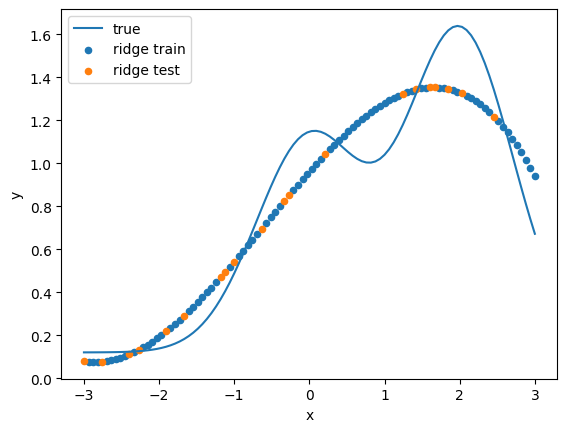

In [237]:
# b)

# predicting the train and test data
y_pred_train = X_train_s @ beta + y_offset
y_pred_test = X_test_s @ beta + y_offset

# plotting the data
plt.plot(x, y, label="true")
plt.scatter(x_train, y_pred_train, s=20, label="ridge train")
plt.scatter(x_test, y_pred_test, s=20, label="ridge test")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

## Exercise 4 - Testing multiple hyperparameters

Text(0.5, 1.0, 'ridge (lambda=0.01)')

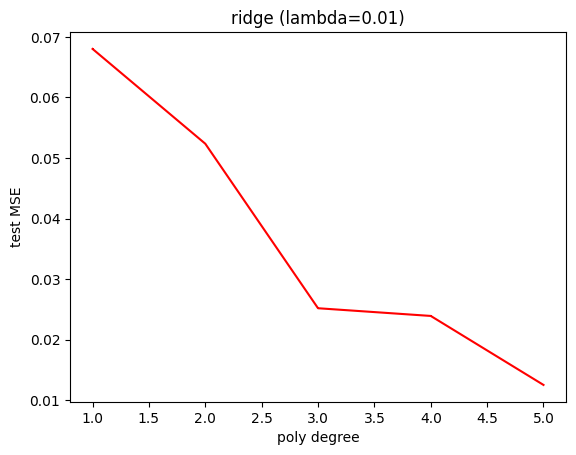

In [238]:
# a) 

# setting up the degrees and lambda
degrees = range(1, 6)
lam = 0.01
mses = []

# looping through the degrees
for p in degrees:
    Xp = polynomial_features(x, p, intercept=False)
    X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.2, random_state=1705)

    # scaling the train and test data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)

    # calculating the offset
    y_offset = np.mean(y_train)
    beta = Ridge_parameters(X_train_s, y_train, lam)

    # predicting the test data
    y_pred_test = X_test_s @ beta + y_offset
    mse = np.mean((y_test - y_pred_test) ** 2)
    mses.append(mse)

# plotting the data
plt.figure()
plt.plot(list(degrees), mses, color='red', marker=',')
plt.xlabel('poly degree')
plt.ylabel('test MSE')
plt.title(f'ridge (lambda={lam})')


Text(0.5, 1.0, 'ridge degree=3')

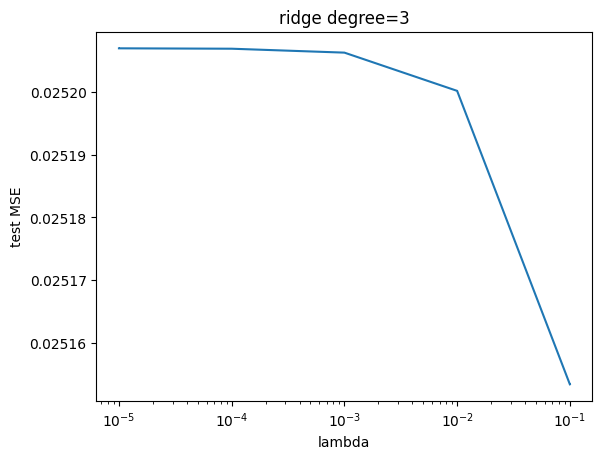

In [239]:
# b)

# setting up the polynomial degree and lambda
p = 3
Xp = polynomial_features(x, p, intercept=False)
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.2, random_state=1705)

# scaling the train and test data
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# setting up the lambda and msesy_offset = np.mean(y_train)
lams = 10.0 ** -np.arange(1, 6)  
mses = []

# looping through the lambda
for lam in lams:
    beta = Ridge_parameters(X_train_s, y_train, lam)
    y_pred = X_test_s @ beta + y_offset
    mses.append(np.mean((y_test - y_pred) ** 2))

# plotting the data
plt.figure()
plt.semilogx(lams, mses, marker=',')
plt.xlabel('lambda')
plt.ylabel('test MSE')
plt.title('ridge degree=3')
